**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [59]:
# write your code here
import numpy as np
from scipy import linalg
from scipy import optimize
from scipy.optimize import root
from scipy.optimize import minimize_scalar
from scipy.optimize import fsolve
from scipy.optimize import minimize
import sympy as sm
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import examproject as ep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 

* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $(1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

I start by defining the parameters.

In [2]:
# Define parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
omega = 1.0
tau = 0.30

I now find the optimal labor supply choice.

In [3]:
# Utility function
def utility(L, omega, kappa, alpha, nu, tau, G):
    C = kappa + (1 - tau) * omega * L
    return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2

# Objective function for optimization
def objective(L, omega, kappa, alpha, nu, tau, G):
    return -utility(L, omega, kappa, alpha, nu, tau, G)

# Optimize the objective function to find the optimal labor supply choice
def optimal_labor_supply(omega, kappa, alpha, nu, tau, G):
    res = minimize_scalar(objective, args=(omega, kappa, alpha, nu, tau, G), bounds=(0, 24), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Values of G to consider
G_values = [1.0, 2.0]

# Calculate optimal labor supply for each G value
for G in G_values:
    L_star = optimal_labor_supply(omega, kappa, alpha, nu, tau, G)
    if L_star is not None:
        print("For G = {:.1f}, the optimal labor supply choice is: L* = {:.4f}".format(G, L_star))
    else:
        print("For G = {:.1f}, there is no valid solution omegaithin the range.".format(G))

For G = 1.0, the optimal labor supply choice is: L* = 15.3017
For G = 2.0, the optimal labor supply choice is: L* = 15.3017


**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

First, I create an array of 100 equally spaced values in the interval between 0.1 to 2.0. This denotes the different values of wages I consider.

Second, I make a loop such that i find the $L^*$ value for each value in w_values. I do this by using the function from the previous question. 

Lastly, I plot the relationship between the wage and optimal labor supply.

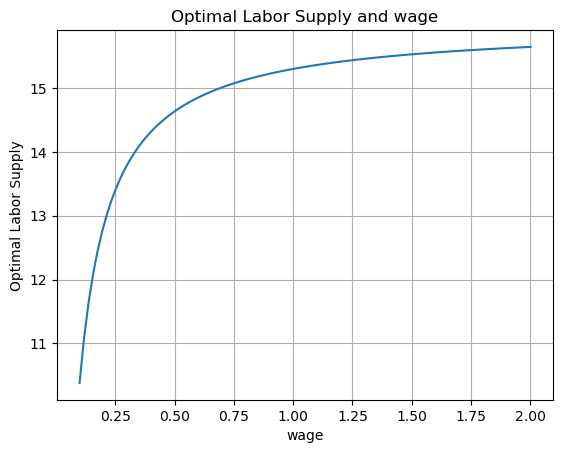

In [4]:
# Values of the wage to consider
w_values = np.linspace(0.1, 2.0, 100)

# Calculate optimal labor supply for each w value
L_values = []
for w in w_values:
    L_star = optimal_labor_supply(w, kappa, alpha, nu, tau, G)
    L_values.append(L_star)

# Plot the relationship between w and L
plt.plot(w_values, L_values)
plt.xlabel('wage')
plt.ylabel('Optimal Labor Supply')
plt.title('Optimal Labor Supply and wage')
plt.grid(True)
plt.show()


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


I create an array of 100 equally spaced values for the tax rates in the interval between 0.0 to 1.0.

I then create empty arrays for storing the results.

The L, G, and worker utility can then be computed for each tax rate. I do that by creating a loop.

The results are finally plotted in a figure with three graphs. 

C:\Users\chris\AppData\Local\Temp\ipykernel_2660\3310256648.py:4: RuntimeWarning: divide by zero encountered in log
  return np.log(C**alpha * G**(1 - alpha)) - nu * L**2 / 2


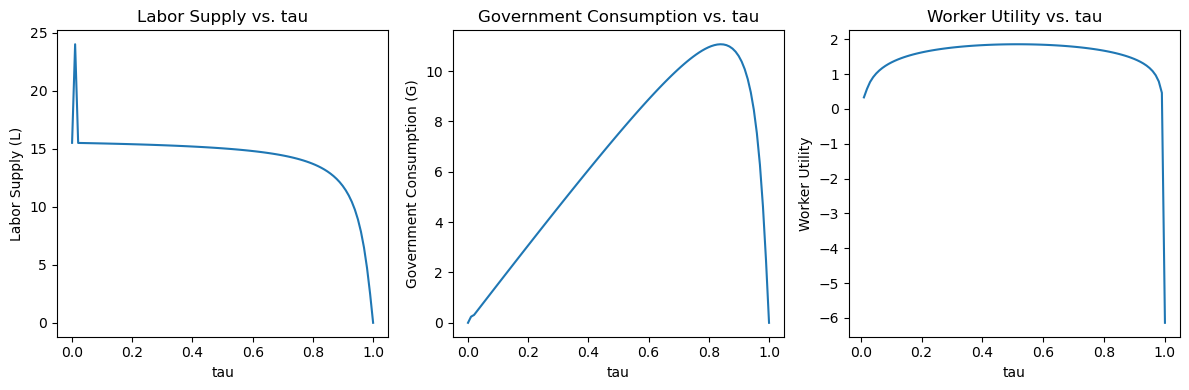

In [6]:
# Define a grid of tau values
tau_values = np.linspace(0.0, 1.0, 100)

# Initialize arrays to store the results
L_values = []
G_values = []
utility_values = []

# Calculate L, G, and utility for each tau value
for tau in tau_values:
    t_omega = (1 - tau) * omega
    L_star = optimal_labor_supply(omega, kappa, alpha, nu, tau, G)
    G = tau * omega * L_star
    utility_val = utility(L_star, omega, kappa, alpha, nu, tau, G)
    
    L_values.append(L_star)
    G_values.append(G)
    utility_values.append(utility_val)

# Plot the results
plt.figure(figsize=(12, 4))

# Plot labor supply
plt.subplot(1, 3, 1)
plt.plot(tau_values, L_values)
plt.xlabel('tau')
plt.ylabel('Labor Supply (L)')
plt.title('Labor Supply vs. tau')

# Plot government consumption
plt.subplot(1, 3, 2)
plt.plot(tau_values, G_values)
plt.xlabel('tau')
plt.ylabel('Government Consumption (G)')
plt.title('Government Consumption vs. tau')

# Plot worker utility
plt.subplot(1, 3, 3)
plt.plot(tau_values, utility_values)
plt.xlabel('tau')
plt.ylabel('Worker Utility')
plt.title('Worker Utility vs. tau')

plt.tight_layout()
plt.show()


I find that the labor supply is a bit peculiar for very small values of tau. It is increasing rapidly and then falls back the the starting point. Then the labor supply is slowly decreasing as the taxes increases. From a taxrate at 0.8 this process speeds up fast.

I see that the government consumption increases for increasing taxes up until 0.8 where it falls off. This is probably due to the labor supply falling - there is not much for the government to consume.

It appears that the worker utility is increasing until the taxes reaches about 0.5, then it slowly decreases until it reaches a very high taxrate, where it decreases a lot.

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

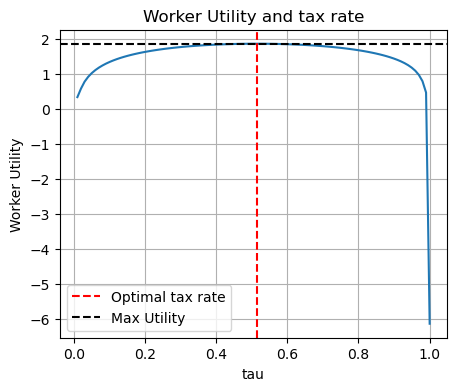

Max Utility: 1.8592
Socially optimal tax rate: 0.5152


In [7]:
# Calculate the maximum utility and corresponding tau
max_utility_index = np.argmax(utility_values)
max_utility_tau = tau_values[max_utility_index]
max_utility = utility_values[max_utility_index]

# Plot the results
plt.figure(figsize=(5, 4))
plt.xlabel('tau')
plt.ylabel('Worker Utility')
plt.title('Worker Utility and tax rate')
plt.plot(tau_values, utility_values)
plt.axvline(x=max_utility_tau, color='r', linestyle='--', label='Optimal tax rate')
plt.axhline(y=max_utility, color='black', linestyle='--', label = 'Max Utility')
plt.legend()
plt.grid(True)
plt.show()

# Print the maximum utility and corresponding tau
print("Max Utility: {:.4f}".format(max_utility))
print("Socially optimal tax rate: {:.4f}".format(max_utility_tau))

A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

I first write up the parameters, and I use the found value of tau from question 4.

I then define the new utility function and objective function.

The objective function is then used to find the optimal labor supply choice.

The G that solves $G = \tau w L^{\star}((1-\tau)w,G)$ is then found by using fsolve. I also compute the utility.

This process is done for both Set 1 and Set 2.

In [8]:
# Set 1 parameters
sigma = 1.001
rho = 1.001
epsilon = 1.0
tau = max_utility_tau # approx 0.5152, from q4

# Utility function
def utility2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    C = kappa + (1 - tau) * omega * L
    return (((alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (1 - sigma)))**(1 - rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon) / (1 + epsilon))

# Objective function for optimization
def objective2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    return -utility2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)

# Optimize the objective function to find the optimal labor supply choice
def optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    res = minimize_scalar(objective2, args=(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G), bounds=(0, 24), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Solve for G using the updated optimal_labor_supply2 function
G_solution_set1 = fsolve(lambda G: optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G) - G, x0=1.0)

# Calculate the corresponding utility for the optimal G
optimal_labor_set1 = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])
utility_set1 = utility2(optimal_labor_set1, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])

print("Set 1:")
print("Optimal G: {:.4f}".format(G_solution_set1[0]))
print("Utility: {:.4f}".format(utility_set1))


Set 1:
Optimal G: 0.0000
Utility: 6.1030


In [9]:
# Set 2 parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0
tau = max_utility_tau # approx 0.5152, from q4

# Solve for G using the updated optimal_labor_supply2 function
G_solution_set2 = fsolve(lambda G: optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G) - G, x0=1.0)

# Calculate the corresponding utility for the optimal G
optimal_labor_set2 = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])
utility_set2 = utility2(optimal_labor_set1, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G_solution_set1[0])

print("Set 1:")
print("Optimal G: {:.4f}".format(G_solution_set2[0]))
print("Utility: {:.4f}".format(utility_set2))

Set 1:
Optimal G: 0.0000
Utility: 1.2751


I find that the optimal G is 0 for both sets. The lower values of sigma and rho in Set 1 results in more utility compared to Set 2, where these parameters have a greater value.

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [10]:
# Set 1 parameters
sigma = 1.001
rho = 1.001
epsilon = 1.0

# Utility function
def utility2(L, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G):
    C = kappa + (1 - tau) * omega * L
    return (((alpha * C**((sigma - 1) / sigma) + (1 - alpha) * G**((sigma - 1) / sigma))**(sigma / (1 - sigma)))**(1 - rho) - 1) / (1 - rho) - nu * (L**(1 + epsilon) / (1 + epsilon))

# Objective function for optimization
def objective3(tau, omega, kappa, alpha, nu, sigma, rho, epsilon, G):
    L_star = optimal_labor_supply2(omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)
    return -utility2(L_star, omega, kappa, alpha, nu, tau, sigma, rho, epsilon, G)

# Function to solve for socially optimal tax rate
def find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G):
    res = minimize_scalar(objective3, args=(omega, kappa, alpha, nu, sigma, rho, epsilon, G), bounds=(0, 1), method='bounded')
    if res.success:
        return res.x
    else:
        return None

# Calculate the socially optimal tax rate
tau_optimal_set1 = find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G_solution_set1[0])

print("Set 1:")
print("Optimal Tau: {:.4f}".format(tau_optimal_set1))

# Set 2 parameters
sigma = 1.5
rho = 1.5
epsilon = 1.0

# Calculate the socially optimal tax rate
tau_optimal_set2 = find_optimal_tax_rate(omega, kappa, alpha, nu, sigma, rho, epsilon, G_solution_set2[0])

print("Set 2:")
print("Optimal Tau: {:.4f}".format(tau_optimal_set2))



Set 1:
Optimal Tau: 1.0000
Set 2:
Optimal Tau: 1.0000


## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

In [11]:
# set parameters
eta = 0.5
w = 1.0
kappa_values =[1.0, 2.0]

# Calculate the optimal hairdresser quantity for each kappa
for kappa in kappa_values:
    # Calculate the optimal hairdresser quantity
    hairdresser_q = ((1 - eta) * kappa / w) ** (1 / eta)

    # Calculate the corresponding profit
    pi = kappa * hairdresser_q ** (1 - eta) - w * hairdresser_q

    # Print the results
    print(f"For kappa = {kappa}:")
    print(f"Optimal hairdresser quantity: {hairdresser_q}")
    print(f"Profit: {pi}\n")


For kappa = 1.0:
Optimal hairdresser quantity: 0.25
Profit: 0.25

For kappa = 2.0:
Optimal hairdresser quantity: 1.0
Profit: 1.0



We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [12]:
# Set seed
np.random.seed(40)

# Parameters
eta = 0.5
w = 1.0
rho = 0.90
iota = 0.01
sigma_epsilon = 0.10
R = (1 + 0.01) ** (1 / 12)
K = 1234  # Number of shock series to simulate

# Initialize variables
epsilon = np.zeros(120)
log_kappa = np.zeros(120)
log_kappa[0] = np.log(1.0)
hq = np.zeros(120)
h_values = np.zeros(K)

# Simulate shock series and calculate h for each series
for k in range(K):
    for t in range(120):
        epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
        if t > 0:
            log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
        kappa = np.exp(log_kappa[t])
        hq[t] = ((1 - eta) * kappa / w) ** (1 / eta)
        
        if t > 0 and hq[t] != hq[t-1]:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t] - iota)
        else:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t])

# Calculate the expected value H
H = np.mean(h_values)

print("Approximated expected value H:", H)

Approximated expected value H: 27.889322847728092


Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [13]:
# Parameters
delta = 0.05  # Threshold for policy change

# Initialize variables
epsilon = np.zeros(120)
log_kappa = np.zeros(120)
log_kappa[0] = np.log(1.0)
hq = np.zeros(120)
h_values = np.zeros(K)

# Hairdresser quantity with previous policy
hq_prev = ((1 - eta) * np.exp(log_kappa[0]) / w) ** (1 / eta)

# Simulate shock series and calculate h for each series
for k in range(K):
    for t in range(120):
        epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
        if t > 0:
            log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
        kappa = np.exp(log_kappa[t])
        hq[t] = ((1 - eta) * kappa / w) ** (1 / eta)
        
        if t > 0 and abs(hq_prev - hq[t]) > delta:
            h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t] - iota)
            hq_prev = hq[t]  # Update hairdresser quantity
        else:
            h_values[k] += R ** (-t) * (kappa * hq_prev ** (1 - eta) - w * hq_prev)

# Calculate the expected value H
H = np.mean(h_values)

print("Approximated expected value H:", H)

Approximated expected value H: 28.41700938633345


I find that the implementation of the new policy does improve the profitability by a bit

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

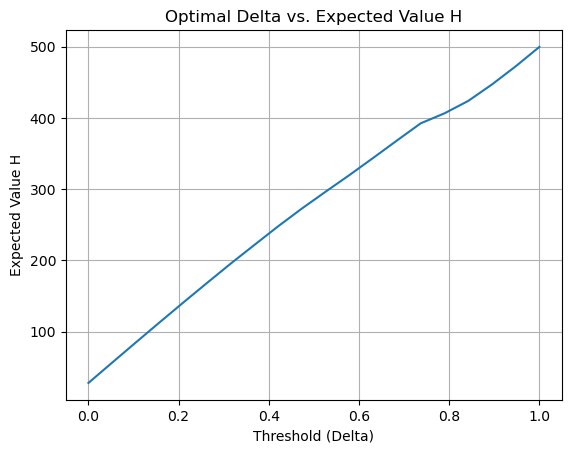

Optimal Delta: 1.0
Maximized H: 499.7393539856824


In [14]:
# Initialize variables
epsilon = np.zeros(120)
log_kappa = np.zeros(120)
log_kappa[0] = np.log(1.0)
hq = np.zeros(120)
h_values = np.zeros(K)

# Range of delta values to test
delta_values = np.linspace(0, 1, 20)
max_H = -np.inf
optimal_delta = None
H_values = []

# Iterate over delta values
for delta in delta_values:
    # Hairdresser quantity with previous policy
    hq_prev = ((1 - eta) * np.exp(log_kappa[0]) / w) ** (1 / eta)

    # Simulate shock series and calculate h for each series
    for k in range(K):
        for t in range(120):
            epsilon[t] = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon)
            if t > 0:
                log_kappa[t] = rho * log_kappa[t-1] + epsilon[t]
            kappa = np.exp(log_kappa[t])
            hq[t] = ((1 - eta) * kappa / w) ** (1 / eta)

            if t > 0 and abs(hq_prev - hq[t]) > delta:
                h_values[k] += R ** (-t) * (kappa * hq[t] ** (1 - eta) - w * hq[t] - iota)
                hq_prev = hq[t]  # Update hairdresser quantity
            else:
                h_values[k] += R ** (-t) * (kappa * hq_prev ** (1 - eta) - w * hq_prev)

    # Calculate the expected value H
    H = np.mean(h_values)
    H_values.append(H)

    # Check if current H is higher than the maximum
    if H > max_H:
        max_H = H
        optimal_delta = delta

# Plotting results
plt.plot(delta_values, H_values)
plt.xlabel('Threshold (Delta)')
plt.ylabel('Expected Value H')
plt.title('Optimal Delta vs. Expected Value H')
plt.grid(True)
plt.show()

print("Optimal Delta:", optimal_delta)
print("Maximized H:", max_H)


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [ ]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [15]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [115]:

def refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations):
    x_best = None
    f_best = np.inf
    iteration_count = 0

    for k in range(max_iterations):
        # Step 3.A: Draw random x^k uniformly within chosen bounds
        x_k = np.random.uniform(bounds[0], bounds[1], size=2)

        if k < warmup_iterations:
            # Step 3.B: Skip to Step 3.E during warm-up iterations
            x_k0 = x_k
        else:
            # Step 3.C: Calculate chi^k
            chi_k = 0.50 * 2 / (1 + np.exp((k - warmup_iterations) / 100))

            # Step 3.D: Calculate x^k0
            x_k0 = chi_k * x_k + (1 - chi_k) * x_best

        # Step 3.E: Run optimizer with x^k0 as initial guess
        result = minimize(griewank, x_k0, method='BFGS', tol=tolerance)

        # Step 3.F: Update x_best if necessary
        if k == 0 or result.fun < f_best:
            x_best = result.x
            f_best = result.fun

        # Step 3.G: Check termination condition
        if f_best < tolerance:
            break

        iteration_count += 1
        # Print iteration number and effective initial guess
        print(f"Iteration {iteration_count}: x_k0 = {x_k0}")

    return x_best, iteration_count

# Settings
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 10
max_iterations = 1000

# Run the optimizer
best_x, total_iterations = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)
print("\nGlobal Minimum:")
print(f"Best x: {best_x}")
print(f"Best f(x): {griewank(best_x)}")
print(f"Total Iterations: {total_iterations}")

Iteration 1: x_k0 = [ 504.17962294 -377.59359687]
Iteration 2: x_k0 = [  49.17147004 -381.62900232]
Iteration 3: x_k0 = [468.9130248  452.70237116]
Iteration 4: x_k0 = [314.02104678 225.25322553]
Iteration 5: x_k0 = [210.54027343 376.1597805 ]
Iteration 6: x_k0 = [535.00868419 576.00458175]
Iteration 7: x_k0 = [411.73803116 509.26785488]
Iteration 8: x_k0 = [-569.89022629  520.43970659]
Iteration 9: x_k0 = [   9.08297685 -568.49756091]
Iteration 10: x_k0 = [538.35336277 179.96841093]
Iteration 11: x_k0 = [-139.00518765   99.1243326 ]
Iteration 12: x_k0 = [205.63732583 112.8639048 ]
Iteration 13: x_k0 = [165.78695594 304.70570305]
Iteration 14: x_k0 = [-41.7095024   -5.83496237]
Iteration 15: x_k0 = [ 207.56976836 -216.21452911]
Iteration 16: x_k0 = [24.66025703 70.44928385]
Iteration 17: x_k0 = [-206.758528  -121.3076818]
Iteration 18: x_k0 = [50.48794271  9.85931623]
Iteration 19: x_k0 = [250.32766043 273.89920752]
Iteration 20: x_k0 = [33.58034559 29.49085557]
Iteration 21: x_k0 = [-

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [103]:
# Settings
bounds = [-600, 600]
tolerance = 1e-8
warmup_iterations = 100
max_iterations = 1000

# Run the optimizer
best_x, total_iterations = refined_global_optimizer(bounds, tolerance, warmup_iterations, max_iterations)
print("\nGlobal Minimum:")
print(f"Best x: {best_x}")
print(f"Best f(x): {griewank(best_x)}")
print(f"Total Iterations: {total_iterations}")

Iteration 1: x_k0 = [  34.34343071 -440.57197471]
Iteration 2: x_k0 = [-136.68459907 -554.67327804]
Iteration 3: x_k0 = [-438.56383242  -78.16048279]
Iteration 4: x_k0 = [-478.05992721  185.33927246]
Iteration 5: x_k0 = [ 508.45089614 -363.31244761]
Iteration 6: x_k0 = [ 550.9803601  -363.75713276]
Iteration 7: x_k0 = [  82.7303149  -415.99096216]
Iteration 8: x_k0 = [ 20.02077972 432.55470172]
Iteration 9: x_k0 = [ 407.08955211 -271.34561488]
Iteration 10: x_k0 = [-515.43277098   89.88304742]
Iteration 11: x_k0 = [-495.88412078 -161.55124084]
Iteration 12: x_k0 = [-431.0811046  -226.54647095]
Iteration 13: x_k0 = [-129.9072345  -375.59327558]
Iteration 14: x_k0 = [ 279.92265987 -579.92534519]
Iteration 15: x_k0 = [  -5.04663022 -591.85813447]
Iteration 16: x_k0 = [-471.43294862 -406.72509073]
Iteration 17: x_k0 = [ 243.909392   -549.77914008]
Iteration 18: x_k0 = [190.40069537 597.66724767]
Iteration 19: x_k0 = [ 342.72856501 -529.1538725 ]
Iteration 20: x_k0 = [-429.99120287 -322.334

The convergence pace do not seem to change much when increasing the number of warmup interations. I still need many iterations before it converges, and it do not seem to find the global minima that often. 